## San Francisco city employee salary data

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.


### Step 1 - Exploration Ideas

1. How have salaries changed over time between different groups of people?
2. How are base pay, overtime pay, and benefits allocated between different groups?
3. How is budget allocated based on different groups and responsibilities?

### Step 2 - Checking the data

**Import tools set**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import data**

In [2]:
sal = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/salaries.csv')
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# Fix the error
sal.sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
139997,139998,Rodrigo C Conel,Special Nurse,23165.44,2361.32,4069.93,5623.45,29596.69,35220.14,2014,NaN,San Francisco,NaN
98745,98746,Andrew M Toran,Custodian,46420.79,943.32,2307.83,23842.19,49671.94,73514.13,2013,NaN,San Francisco,NaN
58182,58183,Jose Carlos Santos,Patient Care Assistant,50847.34,5422.11,3631.03,28038.86,59900.48,87939.34,2012,NaN,San Francisco,NaN
40763,40764,Barbara Walter,Nurse Manager,117190.20,0.00,13275.93,43294.31,130466.13,173760.44,2012,NaN,San Francisco,NaN
16975,16976,ANGEL LALIC,AIRPORT POLICE SERVICES AIDE,54109.86,13961.01,3411.23,NaN,71482.10,71482.10,2011,NaN,San Francisco,NaN


In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### Step 3 - Cleaning the data

In [6]:
# Id must be unique
# So the number of unique values must be equal the number of rows
sal['Id'].nunique() == sal['Id'].count()

True

**Change the type to category**

In [0]:
sal['Id'] = sal['Id'].astype('category')

# Change Year to be a categorical variable too
sal['Year'] = sal['Year'].astype('category')

**Drop unnecessary columns**

In [0]:
# Look at the info() again, which columns you can drop immediately?
sal.drop(columns=['Notes', 'Status'], inplace=True)

In [0]:
# Are there any other columns that don't bring us much information?
sal.drop(columns=['Agency'], inplace=True)

In [10]:
# Check again with info()
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  category
 1   EmployeeName      148654 non-null  object  
 2   JobTitle          148654 non-null  object  
 3   BasePay           148045 non-null  float64 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  category
dtypes: category(2), float64(6), object(2)
memory usage: 15.9+ MB


**Check for NaN values**

In [11]:
sal.isna().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

**Examine few examples of NaN values**

In [12]:
# List all NaN values of OtherPay
sal[sal['OtherPay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014


**Drop missing values of OtherPay and OvertimePay**

In [0]:
# Option 1
#sal.drop(labels=[148646, 148650, 148651, 148652], axis=0, inplace=True)

# Something cooler
# Solution: Select data that OtherPay is not null and assign it to the dataframe 'sal'
sal = sal[sal['OtherPay'].notnull()]

**Analize missing values of BasePay and Benefits**

In [14]:
# Select 5 sample of data that BasePay is null
sal[sal['BasePay'].isnull()].sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
103561,103562,Richard G Johnson,Piledriver Engine Operator,NaN,0.0,22340.80,908.42,22340.80,23249.22,2013
108240,108241,John Candito,Arborist Technician,NaN,0.0,3555.51,643.19,3555.51,4198.70,2013
105192,105193,Frank S Black,Transit Operator,NaN,0.0,5288.21,7959.18,5288.21,13247.39,2013
106926,106927,Rachel Brodwin,"Commissioner 16.700c, No Pay",NaN,0.0,0.00,7959.18,0.00,7959.18,2013
106800,106801,Roger Navarro,Parking Control Officer,NaN,0.0,0.00,7959.18,0.00,7959.18,2013


**For BasePay and Benefits, it is clear that NaN values are zeroes (from TotalPay and TotalPayBenefits).**

**So, simply fill NaN values with 0**

In [0]:
sal['Benefits'].fillna(value=0, inplace=True)

In [0]:
sal['BasePay'].fillna(value=0,inplace=True)

In [17]:
# Let check for NaN values again
sal.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

**Min values of some payments are negative. Let's check it out**

In [18]:
sal[(sal['TotalPay'] < 0) | (sal['TotalPayBenefits'] < 0)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110528,110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,-2.73,2013
110529,110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,-8.20,2013
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,-33.89,2013
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014


In [0]:
# Select data that has negative TotalPay or TotalPayBenefits
# Fill the blanks
sal[(sal['___'] ___) | (sal['___'] ___)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110528,110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,-2.73,2013
110529,110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,-8.20,2013
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,-33.89,2013
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014


**There are only 4 of them, we can safely drop these data**

In [0]:
sal = sal[(sal['TotalPay'] >= 0) & (sal['TotalPayBenefits'] >= 0)]

**Identify any errors or miscoding of variables**

In [20]:
# Check the unique values of Year
sal['Year'].unique()

[2011, 2012, 2013, 2014]
Categories (4, int64): [2011, 2012, 2013, 2014]

Check duplication

In [0]:
# Apply strip() on EmployeeName and Jobtitle 
# to remove all the leading and trailing spaces
sal['EmployeeName'] = sal['EmployeeName'].str.strip()
sal['JobTitle'] = sal['JobTitle'].str.strip()

In [22]:
# Check the number of unique value of EmployeeName
sal['EmployeeName'].nunique()

110806

In [23]:
# Check the number of unique value of EmployeeName in lower case
sal['EmployeeName'].str.lower().nunique()

80455

In [24]:
# Do the same with JobTitle
print(sal['JobTitle'].nunique())
print(sal['JobTitle'].str.lower().nunique())

2158
1636


In [25]:
# Select the most common name
names = sal['EmployeeName'].str.lower().value_counts()
samples = names[names > 1].head(1).index
sal[sal['EmployeeName'].str.lower().isin(samples)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
3824,3825,KEVIN LEE,POLICE OFFICER III,112401.08,19374.72,1062.10,0.00,132837.90,132837.90,2011
4036,4037,KEVIN LEE,POLICE OFFICER II,108000.94,17468.40,6025.54,0.00,131494.88,131494.88,2011
5279,5280,KEVIN LEE,ELECTRICAL TRANSIT SYSTEM MECHANIC,77580.68,36378.97,8858.96,0.00,122818.61,122818.61,2011
13169,13170,KEVIN LEE,DEPUTY COURT CLERK III,83693.01,0.00,609.60,0.00,84302.61,84302.61,2011
13419,13420,KEVIN LEE,DEPUTY COURT CLERK III,83560.00,0.00,0.00,0.00,83560.00,83560.00,2011
15312,15313,KEVIN LEE,PERSONNEL ANALYST,76786.31,0.00,0.00,0.00,76786.31,76786.31,2011
17163,17164,KEVIN LEE,SENIOR PARKING CONTROL OFFICER,65324.60,4944.02,686.93,0.00,70955.55,70955.55,2011
17646,17647,KEVIN LEE,IS ADMINISTRATOR II,66349.74,718.23,2325.47,0.00,69393.44,69393.44,2011
27053,27054,KEVIN LEE,TRANSIT OPERATOR,31501.33,5003.46,770.75,0.00,37275.54,37275.54,2011
39715,39716,Kevin Lee,Police Officer 3,115866.90,23523.30,9313.54,34906.20,148703.74,183609.94,2012


*The names are duplicated because the data describes one person in different years or just because there are people who have same name. It's ok so we only need to uppercase all of the name to eliminate case sensitive.*

*But there are definitely some duplication of Job Title, example `Police Officer 3` and `POLICE OFFICER III`*

In [0]:
# Replace Name and Job Title with its uppercase
sal['EmployeeName'] = sal['EmployeeName'].str.upper()
sal['JobTitle'] = sal['JobTitle'].str.upper()

In [30]:
# Write a regular expression to select JobTitle that ends with a digit
sal['JobTitle'][sal['JobTitle'].str.contains('\d$', regex=True)].value_counts()

POLICE OFFICER 3            2418
POLICE OFFICER 2            1141
SERGEANT 3                  1047
LIBRARIAN 1                  530
HEALTH WORKER 3              438
                            ... 
CASHIER 3                      1
SPECIAL ASSISTANT 13           1
SPECIAL ASSISTANT 18           1
SPECIAL ASSISTANT 8            1
ASST DIR CLINICAL SVCS 2       1
Name: JobTitle, Length: 166, dtype: int64

In [31]:
# Write a regex that count all type of POLICE OFFICER
sal['JobTitle'][sal['JobTitle'].str.contains('^POLICE OFFICER', regex=True)].value_counts()

POLICE OFFICER 3      2418
POLICE OFFICER        1476
POLICE OFFICER 2      1141
POLICE OFFICER III     779
POLICE OFFICER I       467
POLICE OFFICER II      361
Name: JobTitle, dtype: int64

In [32]:
# This is a simple function to transform roman number 
def transform_roman(s):
    d = {'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6, 'VII':7, 'VIII':8, 'IX':9, 'X':10, 
        'XI':11, 'XII':12, 'XIII':13, 'XIV':14, 'XV':15, 'XVI':16, 'XVII':17, 'XVIII':18, 'XIX':19, 'XX':20}
    
    s_split = s.split()
    if s_split[-1] in d.keys():
        s_split[-1] = str(d[s_split[-1]])
    return ' '.join(s_split)

# Test it out
transform_roman('POLICE OFFICER III')

'POLICE OFFICER 3'

In [0]:
# Apply the function above to the column JobTitle
sal['JobTitle'] = sal['JobTitle'].apply(transform_roman)

In [34]:
sal['JobTitle'].sample(5)

15811             GENERAL LABORER
120003           TRANSIT OPERATOR
130079    REAL PROPERTY APPRAISER
79602            REGISTERED NURSE
79915           PROJECT MANAGER 2
Name: JobTitle, dtype: object

### Step 4 - EDA

**Plot categorical data**

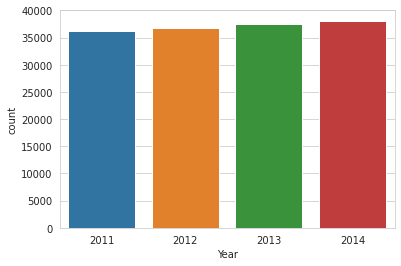

In [35]:
sns.countplot(x='Year', data=sal)

**Top 5 common job titles**

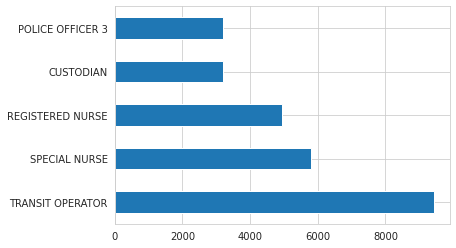

In [37]:
sal['JobTitle'].value_counts().head().plot(kind='barh')

**Distribution of numerical data**

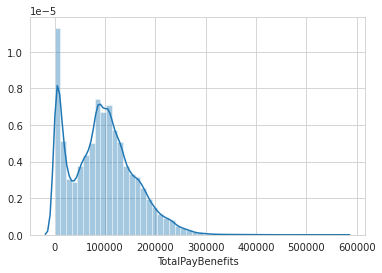

In [38]:
sns.distplot(sal['TotalPayBenefits'])

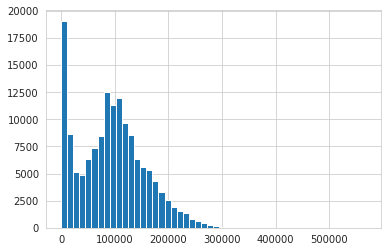

In [40]:
plt.hist(sal['TotalPayBenefits'], bins=50)
plt.show()

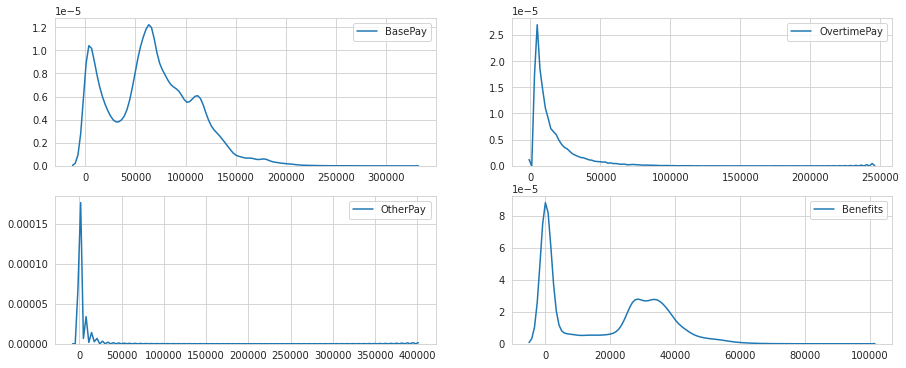

In [42]:
f, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.kdeplot(sal['BasePay'], ax = axes[0][0])
sns.kdeplot(sal['OvertimePay'], ax = axes[0][1])
sns.kdeplot(sal['OtherPay'], ax = axes[1][0])
sns.kdeplot(sal['Benefits'], ax = axes[1][1])
plt.show()

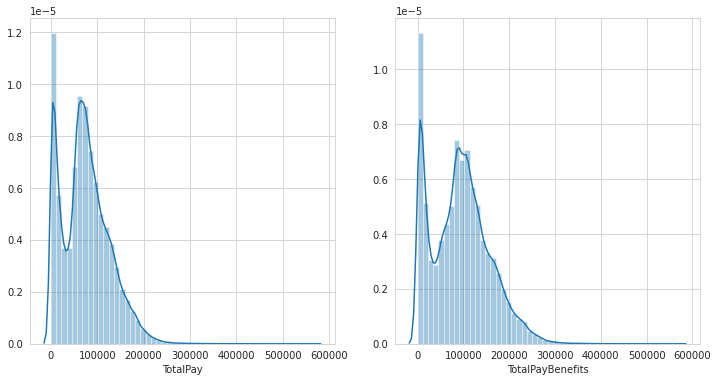

In [43]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(sal['TotalPay'], ax = axes[0])
sns.distplot(sal['TotalPayBenefits'], ax = axes[1])

plt.show()

**Analize richest people**

In [44]:
# Select people that have TotalPayBenefit greater than $300k
sal[sal['TotalPayBenefits'] > 300000]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...
110617,110618,JAY K DOWKE,POLICE OFFICER 3,100148.75,15716.42,152037.57,33847.07,267902.74,301749.81,2014
110618,110619,EDWARD Y CHU,"LIEUTENANT, FIRE SUPPRESSION",129817.24,108123.01,16979.29,46748.39,254919.54,301667.93,2014
110619,110620,MATTHEW J MCNAUGHTON,ASST CHF OF DEPT (FIRE DEPT),205480.80,0.00,29794.80,65881.22,235275.60,301156.82,2014
110620,110621,MADONNA P VALENCIA,"MANAGER, DEPT PUBLIC HEALTH",201305.83,0.00,37292.77,62477.06,238598.60,301075.66,2014


In [0]:
def split_income_type(n):
    if n < 1000:
        return 'Retired'
    elif n < 50000:
        return 'Low Income'
    elif n < 150000:
        return 'Midrange'
    elif n < 250000:
        return 'High Income'
    else:
        return 'Millionaire'

In [46]:
# Apply the function above to create a new column name IncomeType from TotalPayBenefits
sal['IncomeType'] = sal['TotalPayBenefits'].apply(split_income_type)
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,IncomeType
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,Millionaire
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,Millionaire
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,Millionaire
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,Millionaire
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,Millionaire


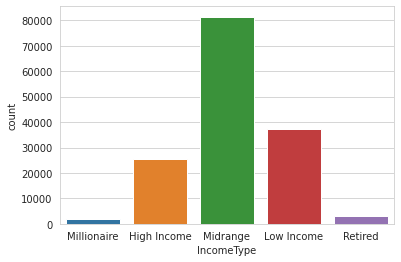

In [47]:
sns.countplot(sal['IncomeType'])

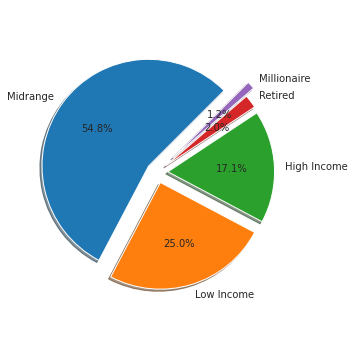

In [48]:
# Pie chart
labels = []
sizes = []
explode = []

labels = sal['IncomeType'].value_counts().index
for index, size in enumerate(sal['IncomeType'].value_counts()):
    sizes.append(size)
    if labels[index]=='Millionaire':
        explode.append(0.2)
    elif labels[index]=='High Income':
        explode.append(0.1)
    else:
        explode.append(0.1)
 
f, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

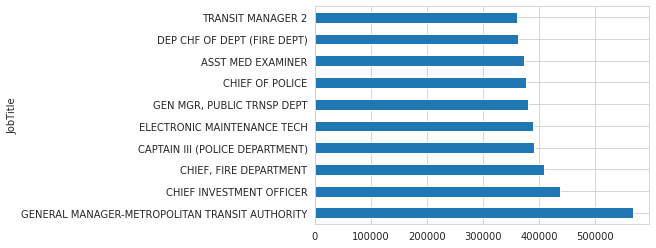

In [49]:
# What is the top 10 Job Title of Millionaire
millionare_jobs = sal[sal['IncomeType'] == 'Millionaire'].groupby('JobTitle').mean()
millionare_jobs.sort_values(by=['TotalPayBenefits'], ascending=False)['TotalPayBenefits'].head(10).plot(kind='barh')

In [52]:
# Find the name of 10 richest men
richest_men = sal.sort_values(by='TotalPayBenefits', ascending=False).head(10)[['EmployeeName', 'JobTitle']].values
richest_men

array([['NATHANIEL FORD',
        'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'],
       ['GARY JIMENEZ', 'CAPTAIN III (POLICE DEPARTMENT)'],
       ['DAVID SHINN', 'DEPUTY CHIEF 3'],
       ['AMY P HART', 'ASST MED EXAMINER'],
       ['WILLIAM J COAKER JR.', 'CHIEF INVESTMENT OFFICER'],
       ['GREGORY P SUHR', 'CHIEF OF POLICE'],
       ['JOANNE M HAYES-WHITE', 'CHIEF, FIRE DEPARTMENT'],
       ['GREGORY P SUHR', 'CHIEF OF POLICE'],
       ['JOANNE M HAYES-WHITE', 'CHIEF, FIRE DEPARTMENT'],
       ['ELLEN G MOFFATT', 'ASST MED EXAMINER']], dtype=object)

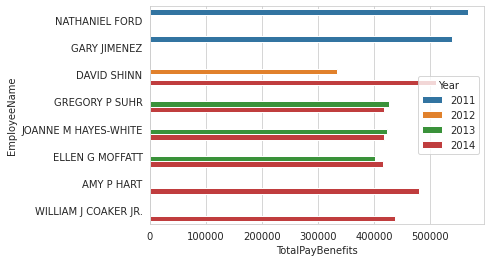

In [54]:
# Analyze TotalPayBenefits of 10 richest man each Year
rich_data = sal[sal['EmployeeName'].isin(richest_men[:, 0]) & sal['JobTitle'].isin(richest_men[:, 1])]
sns.barplot(y='EmployeeName', x='TotalPayBenefits', hue='Year', data=rich_data)

### You are awesome!!